In [1]:
import os
from math import sqrt
import json
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
real_test_ids = set()
for fn in os.listdir("../data/sealion/Test/"):
    if fn.endswith(".jpg"):
        uid, _ = os.path.splitext(fn)
        real_test_ids.add(int(uid))

In [3]:
def get_groundtruth_counts(path):
    df = pd.read_csv(path)
    gt_counts = dict()
    
    def fill_counts(x, counts):
        counts[int(x.train_id)] = [x.adult_males, x.subadult_males, x.adult_females, x.juveniles, x.pups]
    
    _ = df.apply(fill_counts, axis=1, args=(gt_counts, ))
    return gt_counts

In [4]:
gt_counts = get_groundtruth_counts("../data/sealion/my_correct_counts.csv")

In [5]:
all_train_ids = set(gt_counts.keys())

In [6]:
pups_counts = dict()
with open("../data/sealion/pups_mean.csv", "r") as ifile:
    for line in ifile:
        iid, cnt = line.split(",")
        pups_counts[int(iid)] = int(round(float(cnt)))

In [11]:
train_counts_pups = []
for cnt in gt_counts.values():
    train_counts_pups.append(cnt[4])

In [46]:
np.std(train_counts_pups)

48.0150886651086

(array([ 0.14237515,  0.00677977,  0.00319048,  0.00498512,  0.00239286,
         0.00259226,  0.00239286,  0.00159524,  0.00219345,  0.00099702,
         0.00199405,  0.00119643,  0.00199405,  0.00059821,  0.00039881,
         0.00079762,  0.00059821,  0.00059821,  0.00039881,  0.00059821,
         0.00039881,  0.00059821,  0.00099702,  0.00059821,  0.00039881,
         0.00039881,  0.00039881,  0.00059821,  0.00039881,  0.00039881,
         0.0001994 ,  0.0001994 ,  0.00039881,  0.0001994 ,  0.00039881,
         0.0001994 ,  0.0001994 ,  0.        ,  0.0001994 ,  0.00039881,
         0.0001994 ,  0.0001994 ,  0.0001994 ,  0.0001994 ,  0.0001994 ,
         0.0001994 ,  0.0001994 ,  0.0001994 ,  0.        ,  0.        ,
         0.0001994 ,  0.0001994 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.0001994 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.0001994 ,  0.        ,  0.        ,  0. 

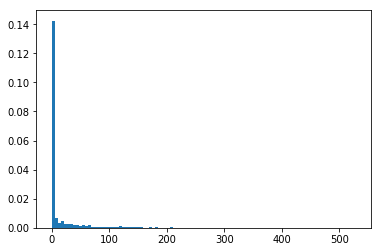

In [14]:
plt.hist(train_counts_pups, bins=100, normed=True)

In [31]:
np.std(list(pups_counts.values()))

58.098938240340196

(array([  1.13090007e-01,   2.25298500e-02,   1.42579715e-02,
          8.88688806e-03,   6.20134634e-03,   4.31531704e-03,
          3.57730557e-03,   2.62404076e-03,   2.33703631e-03,
          1.57852452e-03,   1.57852452e-03,   1.24026927e-03,
          1.31202038e-03,   9.84015287e-04,   8.91763854e-04,
          6.15009554e-04,   5.63758758e-04,   5.02257803e-04,
          4.61257166e-04,   4.20256529e-04,   3.38255255e-04,
          3.17754936e-04,   2.35753662e-04,   1.74252707e-04,
          1.64002548e-04,   8.20012739e-05,   8.20012739e-05,
          1.64002548e-04,   1.02501592e-04,   1.02501592e-04,
          1.02501592e-04,   7.17511147e-05,   5.12507962e-05,
          6.15009554e-05,   8.20012739e-05,   4.10006369e-05,
          9.22514331e-05,   3.07504777e-05,   5.12507962e-05,
          0.00000000e+00,   4.10006369e-05,   6.15009554e-05,
          1.02501592e-05,   5.12507962e-05,   2.05003185e-05,
          2.05003185e-05,   1.02501592e-05,   1.02501592e-05,
        

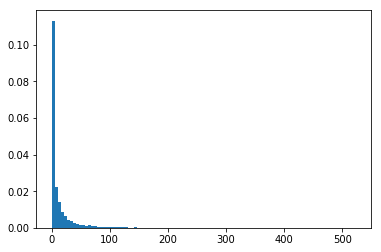

In [19]:
plt.hist(np.array(list(pups_counts.values()))/2, bins=100, normed=True)

In [47]:
new_pups_counts = dict()
for iid, cnt in pups_counts.items():
    new_pups_counts[iid] = int(np.floor(cnt/1.5))

In [48]:
np.mean(list(new_pups_counts.values()))

17.161354367890105

In [49]:
np.std(list(new_pups_counts.values()))

38.712239221197173

In [50]:
def predict_counts_mean_pups(ids, train_counts, pups_counts):
    """ Return a dict id -> counts (5 elts list)
    """
    means = [0, 0, 0, 0, 0]
    for _, counts in train_counts.items():
        for sid in range(5):
            means[sid] += counts[sid]
            
    for sid in range(5):
        means[sid] /= len(train_counts)
        means[sid] = int(round(means[sid]))
        
    counts = dict()
    for iid in ids:
        counts[iid] = means.copy()
        counts[iid][4] = pups_counts[iid]
    return counts

In [51]:
len(new_pups_counts)

18636

In [52]:
len(real_test_ids)

18636

In [53]:
counts = predict_counts_mean_pups(real_test_ids, gt_counts, new_pups_counts)

In [54]:
def write_submission(counts, out_fn):
    with open(out_fn, "w") as ofile:
        ofile.write("test_id,adult_males,subadult_males,adult_females,juveniles,pups\n")
        for iid in sorted(counts.keys()):
            str_counts = ",".join([str(int(round(c))) for c in counts[iid]])
            ofile.write("{iid},{counts}\n".format(iid=iid, counts=str_counts))

In [55]:
int(datetime.timestamp(datetime.now()))

1495466371

In [58]:
write_submission(counts, "../data/submissions/1495466371_mean_prediction_and_pups_decreased_1.5.csv")

In [59]:
!head ../data/submissions/1495466371_mean_prediction_and_pups_decreased_1.5.csv

test_id,adult_males,subadult_males,adult_females,juveniles,pups
0,6,4,39,21,0
1,6,4,39,21,0
2,6,4,39,21,4
3,6,4,39,21,0
4,6,4,39,21,5
5,6,4,39,21,10
6,6,4,39,21,0
7,6,4,39,21,2
8,6,4,39,21,1


In [28]:
!wc -l ../data/submissions/1495466087_mean_prediction_and_pups_decreased.csv

18637 ../data/submissions/1495466087_mean_prediction_and_pups_decreased.csv


In [11]:
def get_rmse(predicted_counts, groundtruth_counts):
    N_SEALION_TYPES = 5
    # Check if all predicted ids are also in validation ids
    predicted_ids = set(predicted_counts.keys())
    set_validation_ids  = set(groundtruth_counts.keys())
    assert(predicted_ids.issubset(set_validation_ids))
    
    # Compute rmse for each type
    rmses = [0 for _ in range(N_SEALION_TYPES)]
    for iid, pred_counts in predicted_counts.items():
        true_counts = groundtruth_counts[iid]
        for sid in range(N_SEALION_TYPES):
            dc = pred_counts[sid] - true_counts[sid]
            rmses[sid] += dc * dc
            
    for sid in range(N_SEALION_TYPES):
        rmses[sid] /= len(predicted_counts)
        rmses[sid] = sqrt(rmses[sid])
    print(rmses)    
    return np.mean(rmses)

In [12]:
with open("../data/sealion/train.json", "r") as jfile:
    train_ids = json.load(jfile)
train_ids = [int(iid) for iid in train_ids]

In [13]:
with open("../data/sealion/val.json", "r") as jfile:
    val_ids = json.load(jfile)
val_ids = [int(iid) for iid in val_ids]

In [14]:
with open("../data/sealion/test.json", "r") as jfile:
    test_ids = json.load(jfile)
test_ids = [int(iid) for iid in test_ids]

In [15]:
def get_groundtruth_counts(path):
    df = pd.read_csv(path)
    gt_counts = dict()
    
    def fill_counts(x, counts):
        counts[int(x.train_id)] = [x.adult_males, x.subadult_males, x.adult_females, x.juveniles, x.pups]
    
    _ = df.apply(fill_counts, axis=1, args=(gt_counts, ))
    return gt_counts

In [16]:
gt_counts = get_groundtruth_counts("../data/sealion/my_correct_counts.csv")

In [17]:
predicted_counts = predict_counts(val_ids)

In [18]:
get_rmse(predicted_counts, gt_counts)

[10.049316595915556, 7.558386963046154, 68.45912419388125, 34.073367635478476, 47.029873365383885]


33.434013750741066

In [19]:
def predict_counts_mean(ids, train_counts):
    """ Return a dict id -> counts (5 elts list)
    """
    means = [0, 0, 0, 0, 0]
    for _, counts in train_counts.items():
        for sid in range(5):
            means[sid] += counts[sid]
            
    for sid in range(5):
        means[sid] /= len(train_counts)
        means[sid] = int(round(means[sid]))
        
    counts = dict()
    for iid in ids:
        counts[iid] = means
    
    return counts

In [20]:
train_counts = dict()
for iid in train_ids:
    train_counts[iid] = gt_counts[iid]

In [21]:
predicted_counts_mean = predict_counts_mean(val_ids, train_counts)

In [22]:
get_rmse(predicted_counts_mean, gt_counts)

[8.240077451365028, 6.019164151163489, 57.90684110872403, 28.50832718875528, 44.32211003779318]


28.9993039875602

# Cross validation pipeline

In [23]:
from sklearn.model_selection import KFold

In [24]:
kf = KFold(n_splits=4, shuffle=True, random_state=42)

In [25]:
X = np.array(list(gt_counts.keys())).reshape(-1, 1)

In [26]:
rmses = []
for train, test in kf.split(X):
    train_ids = list(train)
    test_ids = list(test)
    train_counts = dict()
    for iid in train_ids:
        train_counts[iid] = gt_counts[iid]
    predicted_counts_mean = predict_counts_mean(test_ids, train_counts)
    rmse = get_rmse(predicted_counts_mean, gt_counts)
    rmses.append(rmse)
    print(list(predicted_counts_mean.values())[0], rmse)
    

[6.678891744646627, 5.88353922016963, 63.28530268446995, 53.31381499384857, 42.47828931691034]
[6, 4, 39, 20, 18] 34.327967592
[7.53808893620436, 5.291502622129181, 59.64080244644346, 32.54364158472338, 47.079966086978594]
[6, 4, 40, 22, 17] 30.4188003353
[7.7484175599630865, 6.879922480183431, 69.69856738383257, 42.15703013583165, 51.301787665943166]
[6, 4, 39, 20, 17] 35.5571450452
[8.322102136254081, 7.182374112387586, 77.21469876028365, 32.7914391421398, 50.77650209060252]
[5, 4, 37, 21, 16] 35.2574232483


In [28]:
np.mean(rmses)

33.890334055197286

In [29]:
get_rmse(gt_counts, gt_counts)

[0.0, 0.0, 0.0, 0.0, 0.0]


0.0

# Create a submission with all train data

In [30]:
real_predicted_counts_mean = predict_counts_mean(real_test_ids, gt_counts)   

In [32]:
int(datetime.timestamp(datetime.now()))

1495201291

In [33]:
write_submission(real_predicted_counts_mean, "../data/submissions/1495097083_mean_prediction_all_train_data.csv")

In [34]:
!head "../data/submissions/1495097083_mean_prediction_all_train_data.csv"

test_id,adult_males,subadult_males,adult_females,juveniles,pups
0,6,4,39,21,17
1,6,4,39,21,17
2,6,4,39,21,17
3,6,4,39,21,17
4,6,4,39,21,17
5,6,4,39,21,17
6,6,4,39,21,17
7,6,4,39,21,17
8,6,4,39,21,17


In [35]:
!wc -l "../data/submissions/1495097083_mean_prediction_all_train_data.csv"

18637 ../data/submissions/1495097083_mean_prediction_all_train_data.csv


In [36]:
pred = {0:[1, 2, 3, 4, 5], 1:[6, 7, 8, 9, 10], 2:[11, 12, 13, 14, 15]}
gt = {0:[0, 0, 0, 0, 0], 1:[0, 0, 0, 0, 0], 2:[0, 0, 0, 0, 0]}

In [37]:
get_rmse(pred, gt)

[7.2571803523590805, 8.103497187428813, 8.981462390204987, 9.882644720249063, 10.801234497346433]


9.0052038295176757

In [38]:
def get_rmse_row_wise(predicted_counts, groundtruth_counts):
    N_SEALION_TYPES = 5
    # Check if all predicted ids are also in validation ids
    predicted_ids = set(predicted_counts.keys())
    set_validation_ids  = set(groundtruth_counts.keys())
    assert(predicted_ids.issubset(set_validation_ids))
    
    # Compute rmse for each type
    rmses = []
    for iid, pred_counts in predicted_counts.items():
        true_counts = groundtruth_counts[iid]
        row_rmse = 0
        for sid in range(N_SEALION_TYPES):
            dc = pred_counts[sid] - true_counts[sid]
            row_rmse += dc * dc
        row_rmse/=5
        row_rmse = sqrt(row_rmse)
        rmses.append(row_rmse)
        
    return np.mean(rmses)

In [39]:
get_rmse_row_wise(pred, gt)

8.1724533418711278

In [40]:
69/0.7

98.57142857142858

In [41]:
30/0.3

100.0

In [42]:
def random_mean_stratified_split(gt_counts, ratio=0.7):
    available_ids = set(gt_counts.keys())
    train_ids = set()
    test_ids = set()
    
    train_sums = np.zeros((5, ), dtype=np.float32)
    test_sums = np.zeros((5, ), dtype=np.float32)
    
    while True:
        while available_ids and (len(train_ids)/ratio <= len(test_ids)/(1 - ratio) or len(train_ids) == 0): 
            # Add a randomly selected id to the train set
            index = np.random.choice(len(available_ids), replace=False)
            rid = list(available_ids)[index]
            available_ids.remove(rid)
            train_ids.add(rid)
            train_sums += np.asarray(gt_counts[rid])
        
        train_means = train_sums/len(train_ids)
        
        # Select a id that minimize the mean difference
        best_id = -1
        best_error = 1e9
        if not available_ids:
            break
        for tid in available_ids:
            local_sums = test_sums + np.asarray(gt_counts[tid])
            local_means = local_sums/(len(test_ids) + 1)
            error = np.sum(np.square(local_means - train_means))
            if error < best_error:
                best_error = error
                best_id = tid
        test_ids.add(best_id)
        test_sums += np.asarray(gt_counts[best_id])
        available_ids.remove(best_id)
        
    final_error = np.sum(np.square(test_sums/len(test_ids) - train_sums/len(train_ids)))
    print("Final error: ", final_error)
    return train_ids, test_ids

In [43]:
train_ids, test_ids = random_mean_stratified_split(gt_counts)

Final error:  0.202523


In [44]:
rmses = []
for i in range(5):
    train_ids, test_ids = random_mean_stratified_split(gt_counts)
    train_counts = dict()
    for iid in train_ids:
        train_counts[iid] = gt_counts[iid]
    #predicted_counts_mean = predict_counts(test_ids)    
    predicted_counts_mean = predict_counts_mean(test_ids, train_counts)
    rmse = get_rmse(predicted_counts_mean, gt_counts)
    rmses.append(rmse)
    print(list(predicted_counts_mean.values())[0], rmse)

Final error:  0.67307
[6.50802473604029, 5.571544244027673, 47.461304644905105, 30.260506367442616, 34.93517806834061]
[6, 4, 39, 21, 17] 24.9473116122
Final error:  0.208129
[6.722572606981672, 5.3176303916741094, 49.86585513928273, 29.997836179274604, 37.01493297519117]
[6, 4, 39, 21, 17] 25.7837654585
Final error:  0.77703
[7.060639601264702, 5.422500232543086, 50.93215301286915, 28.581615978279196, 37.34551806171988]
[5, 4, 39, 21, 17] 25.8684853773
Final error:  0.116361
[6.865116500206207, 5.223429000792084, 47.68121480849702, 25.33370267505463, 35.64203117058443]
[6, 4, 39, 21, 17] 24.149098831
Final error:  0.914914
[6.609668622423185, 5.387119140280726, 49.89975916687656, 26.461292485439937, 35.41275416985717]
[6, 4, 39, 21, 17] 24.754118717


In [45]:
np.mean(rmses)

25.100555999193944